CARGANDO DATOS DESDE RUTA LOCAL - VISUAL STUDIO CODE
Ruta base: C:\Users\Mario Leyser\PROYECTO_BASE\Interboot\INTERBOOT
Ruta ZIP: C:\Users\Mario Leyser\PROYECTO_BASE\Interboot\INTERBOOT\data\raw\store-sales-time-series-forecasting.zip
Ruta extracción: C:\Users\Mario Leyser\PROYECTO_BASE\Interboot\INTERBOOT\data\raw
✓ Archivos CSV ya existen, omitiendo extracción
Archivos CSV encontrados: ['holidays_events.csv', 'oil.csv', 'sample_submission.csv', 'stores.csv', 'test.csv', 'train.csv', 'transactions.csv']
✓ train.csv cargado - Dimensiones: (3000888, 6)
✓ test.csv cargado - Dimensiones: (28512, 5)
✓ stores.csv cargado - Dimensiones: (54, 5)
✓ oil.csv cargado - Dimensiones: (1218, 2)
✓ transactions.csv cargado - Dimensiones: (83488, 3)
✓ holidays_events.csv cargado - Dimensiones: (350, 6)

EXPLORACIÓN INICIAL DE DATOS
=== DATASET DE ENTRENAMIENTO (train.csv) ===
Dimensiones: (3000888, 6)
Filas: 3,000,888, Columnas: 6

Primeras 5 filas:
   id        date  store_nbr      family  sales  onpr

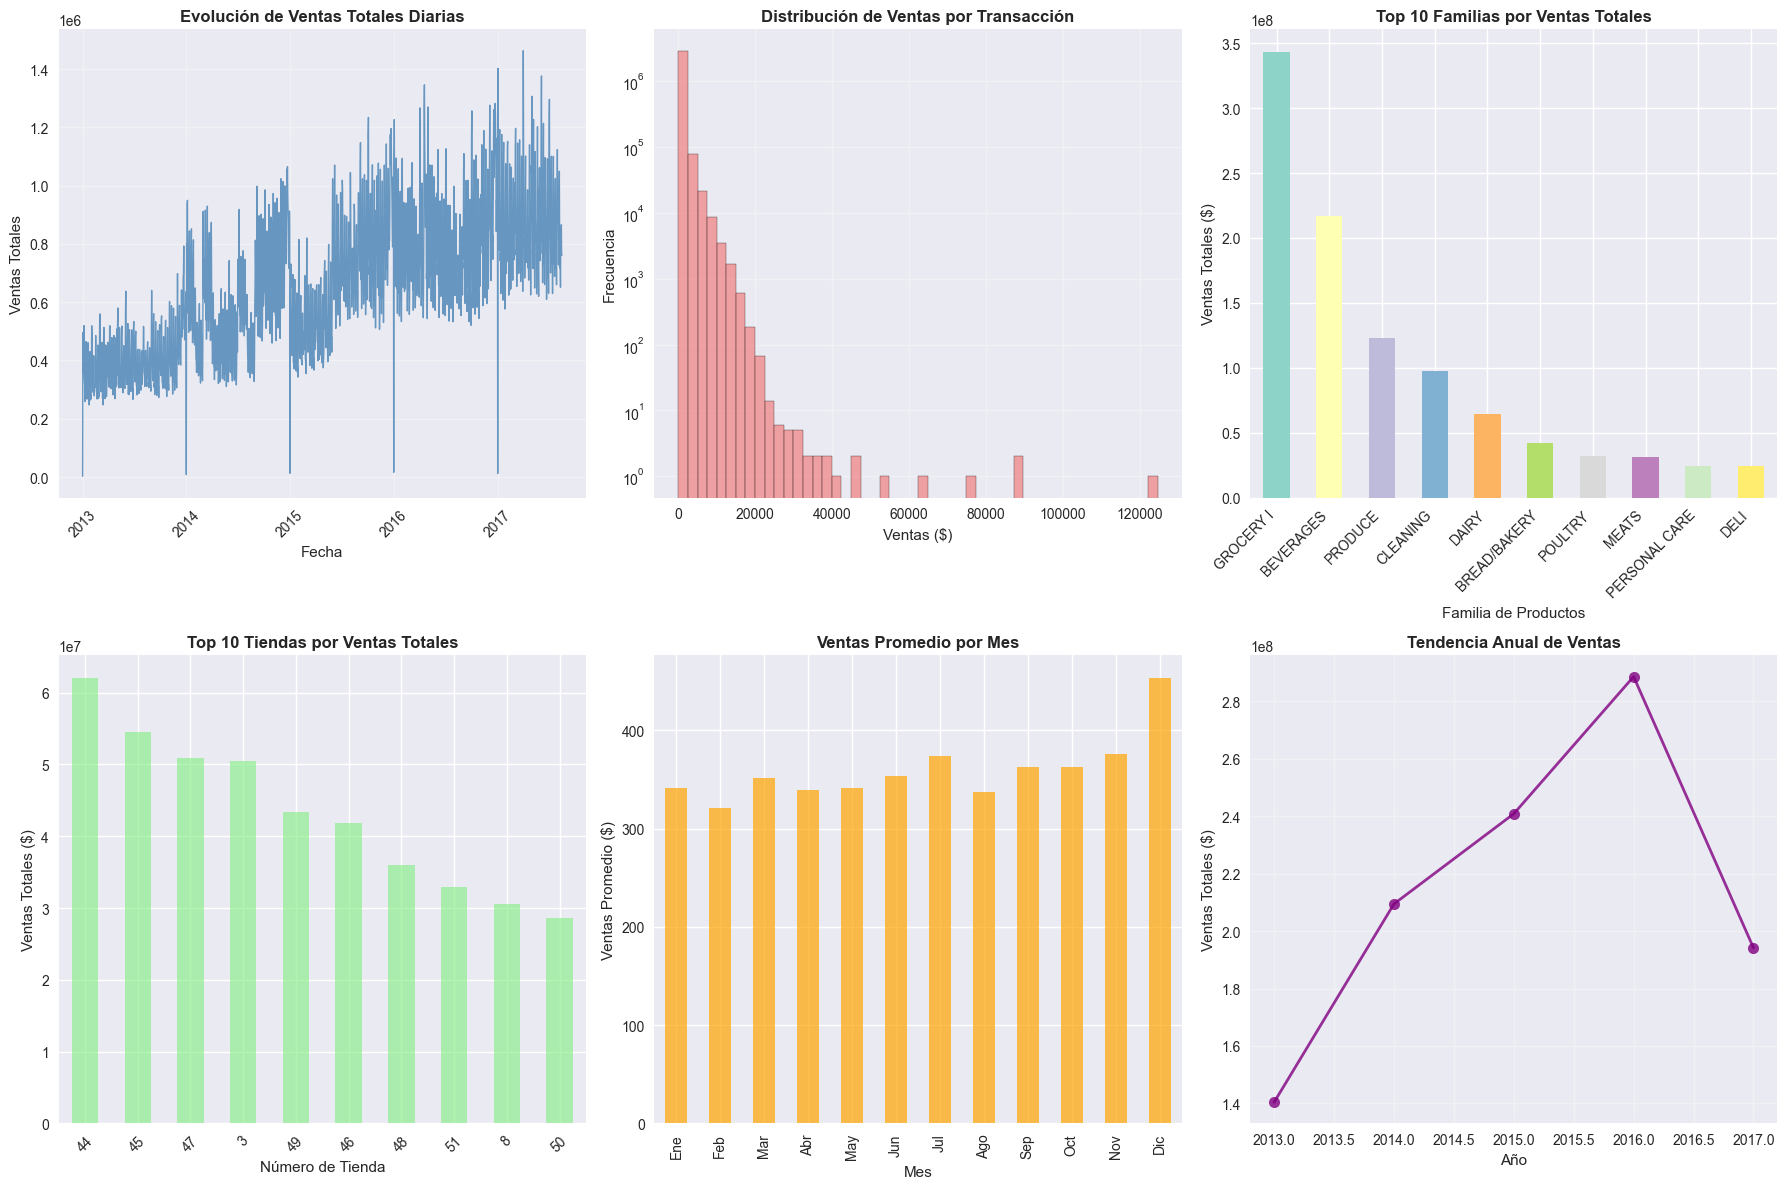

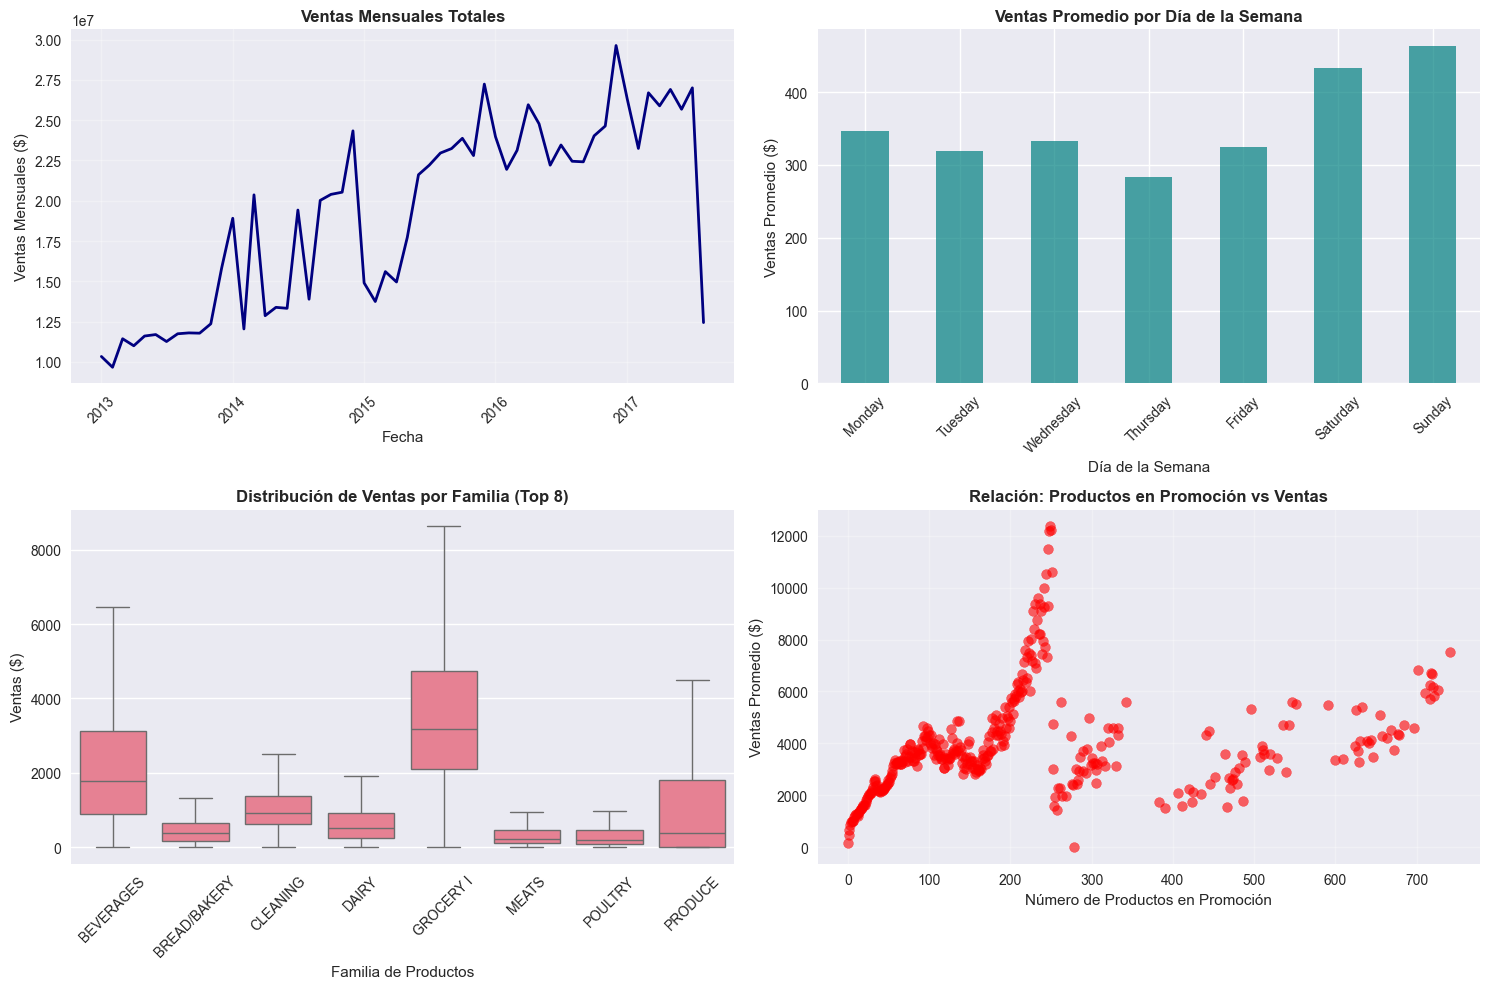


GUARDANDO RESULTADOS
✓ Dataset limpio guardado como: C:\Users\Mario Leyser\PROYECTO_BASE\Interboot\INTERBOOT\data\processed\sales_data_cleaned.csv
✓ Resumen de estadísticas guardado como: C:\Users\Mario Leyser\PROYECTO_BASE\Interboot\INTERBOOT\data\processed\estadisticas_descriptivas.txt

Guardando gráficas...
✓ Gráfica de evolución temporal guardada: C:\Users\Mario Leyser\PROYECTO_BASE\Interboot\INTERBOOT\plots\evolucion_ventas_diarias.png
✓ Gráfica de distribución guardada: C:\Users\Mario Leyser\PROYECTO_BASE\Interboot\INTERBOOT\plots\distribucion_ventas.png
✓ Gráfica de top familias guardada: C:\Users\Mario Leyser\PROYECTO_BASE\Interboot\INTERBOOT\plots\top_familias_productos.png

ANÁLISIS COMPLETADO EXITOSAMENTE

📊 RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO:
═══════════════════════════════════════════════════════
   📅 Periodo analizado: 01/01/2013 - 15/08/2017
   📈 Total de registros: 3,000,888
   💰 Ventas totales: $1,073,644,952.20
   🏪 Número de tiendas: 54
   🛍️ Familias de pr

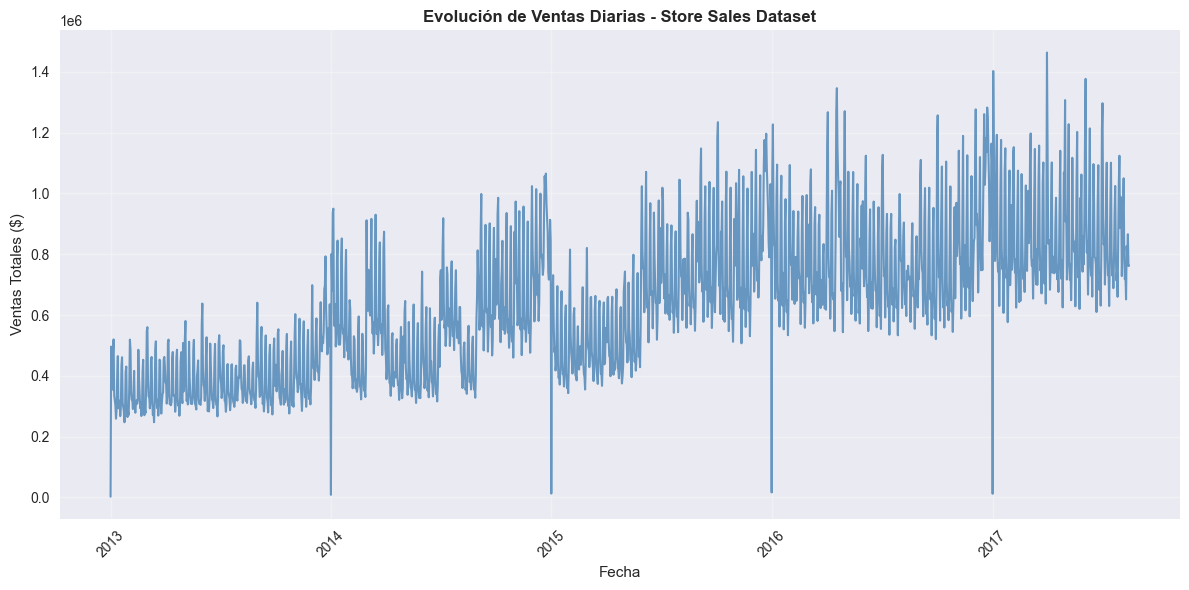

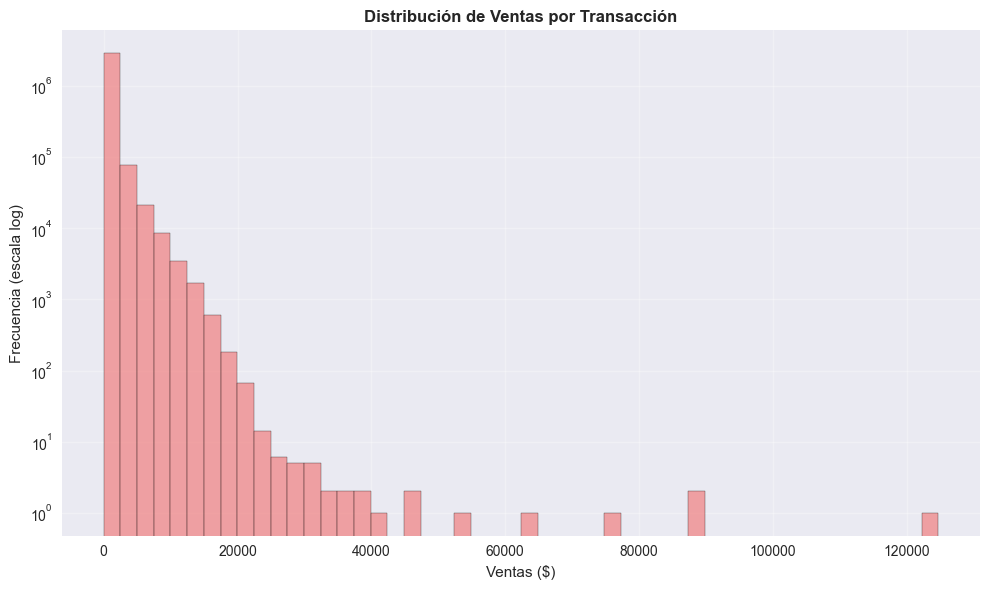

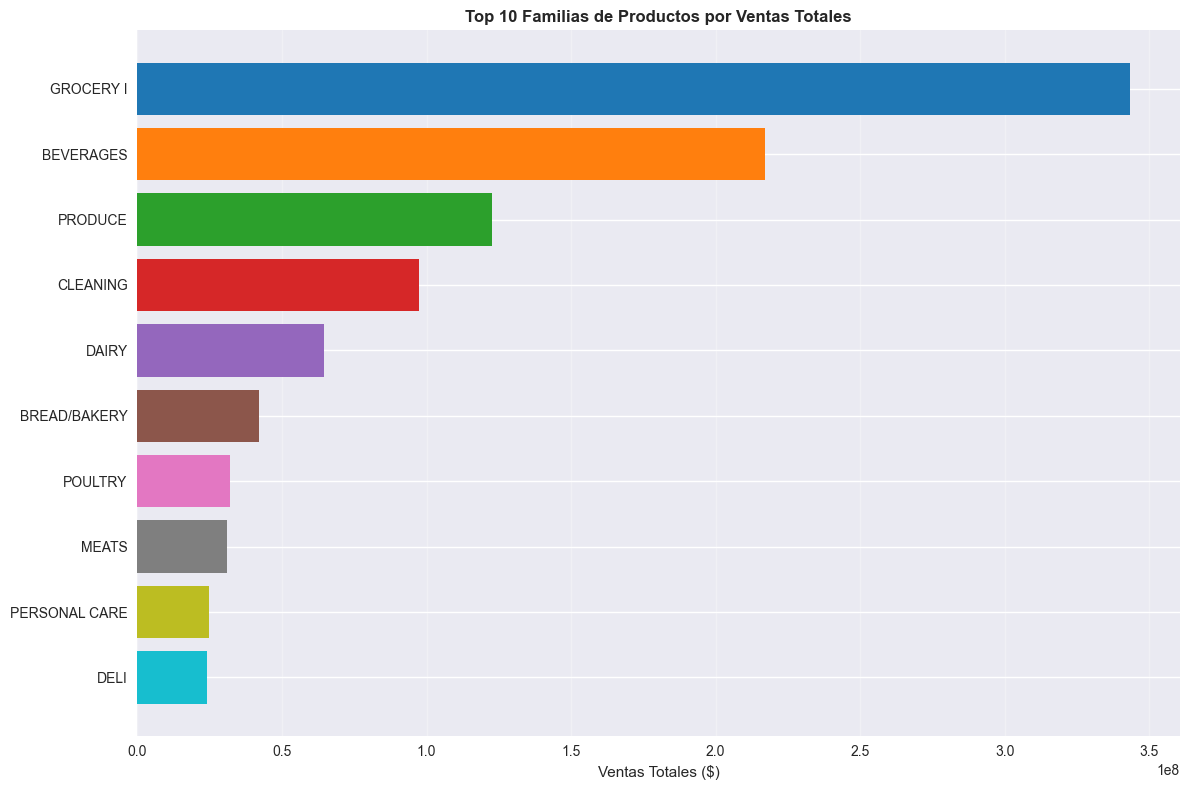

In [1]:
# 1️⃣ Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración para Visual Studio Code
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# 2️⃣ Cargar datos
print("=" * 60)
print("CARGANDO DATOS DESDE RUTA LOCAL - VISUAL STUDIO CODE")
print("=" * 60)

# Definir rutas locales para Windows
zip_path = r"C:\Users\Mario Leyser\PROYECTO_BASE\Interboot\INTERBOOT\data\raw\store-sales-time-series-forecasting.zip"
base_dir = r"C:\Users\Mario Leyser\PROYECTO_BASE\Interboot\INTERBOOT"
extract_path = os.path.join(base_dir, "data", "raw")
processed_path = os.path.join(base_dir, "data", "processed")
plots_path = os.path.join(base_dir, "plots")

# Crear directorios necesarios
os.makedirs(extract_path, exist_ok=True)
os.makedirs(processed_path, exist_ok=True)
os.makedirs(plots_path, exist_ok=True)

print(f"Ruta base: {base_dir}")
print(f"Ruta ZIP: {zip_path}")
print(f"Ruta extracción: {extract_path}")

# Extraer archivos zip si no existen los CSV
csv_files = ['train.csv', 'test.csv', 'stores.csv', 'oil.csv', 'transactions.csv', 'holidays_events.csv']
files_exist = all(os.path.exists(os.path.join(extract_path, f)) for f in csv_files)

if not files_exist:
    try:
        print("Extrayendo archivos zip...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print("✓ Archivos extraídos exitosamente")
    except Exception as e:
        print(f"Error al extraer archivos: {e}")
        print("Verifica la ruta del archivo zip")
else:
    print("✓ Archivos CSV ya existen, omitiendo extracción")

# Listar archivos extraídos
extracted_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
print(f"Archivos CSV encontrados: {extracted_files}")

# Cargar los archivos principales
try:
    # Cargar datos de entrenamiento
    train_path = os.path.join(extract_path, 'train.csv')
    train_df = pd.read_csv(train_path)
    print(f"✓ train.csv cargado - Dimensiones: {train_df.shape}")
    
    # Cargar datos de test
    test_path = os.path.join(extract_path, 'test.csv')
    test_df = pd.read_csv(test_path)
    print(f"✓ test.csv cargado - Dimensiones: {test_df.shape}")
    
    # Cargar datos de tiendas
    stores_path = os.path.join(extract_path, 'stores.csv')
    stores_df = pd.read_csv(stores_path)
    print(f"✓ stores.csv cargado - Dimensiones: {stores_df.shape}")
    
    # Cargar datos de petróleo
    oil_path = os.path.join(extract_path, 'oil.csv')
    oil_df = pd.read_csv(oil_path)
    print(f"✓ oil.csv cargado - Dimensiones: {oil_df.shape}")
    
    # Cargar datos de transacciones
    transactions_path = os.path.join(extract_path, 'transactions.csv')
    transactions_df = pd.read_csv(transactions_path)
    print(f"✓ transactions.csv cargado - Dimensiones: {transactions_df.shape}")
    
    # Cargar datos de festivos
    holidays_path = os.path.join(extract_path, 'holidays_events.csv')
    holidays_df = pd.read_csv(holidays_path)
    print(f"✓ holidays_events.csv cargado - Dimensiones: {holidays_df.shape}")
    
except FileNotFoundError as e:
    print(f"Error cargando archivos: {e}")
    # Buscar archivos alternativos en el directorio
    all_files = os.listdir(extract_path)
    csv_files = [f for f in all_files if f.endswith('.csv')]
    print(f"Archivos CSV disponibles: {csv_files}")

# 3️⃣ Explorar datos
print("\n" + "=" * 60)
print("EXPLORACIÓN INICIAL DE DATOS")
print("=" * 60)

# Explorar el dataset principal (train)
print("=== DATASET DE ENTRENAMIENTO (train.csv) ===")
print(f"Dimensiones: {train_df.shape}")
print(f"Filas: {train_df.shape[0]:,}, Columnas: {train_df.shape[1]}")

print("\nPrimeras 5 filas:")
print(train_df.head())

print("\nInformación del dataset:")
train_df.info()

print("\nValores nulos por columna:")
null_counts = train_df.isnull().sum()
print(null_counts[null_counts > 0])

print("\nEstadísticas descriptivas de ventas:")
print(train_df['sales'].describe())

# Explorar estructura de otros datasets
print("\n=== ESTRUCTURA DE TODOS LOS DATASETS ===")
datasets = {
    'train': train_df,
    'test': test_df,
    'stores': stores_df,
    'oil': oil_df,
    'transactions': transactions_df,
    'holidays': holidays_df
}

for name, df in datasets.items():
    if df is not None:
        print(f"{name.upper():<15}: {str(df.shape):<10} Columnas: {list(df.columns)}")

# 4️⃣ Limpiar datos
print("\n" + "=" * 60)
print("LIMPIEZA DE DATOS")
print("=" * 60)

# Trabajar con una copia del dataset principal
df_clean = train_df.copy()

print("Columnas originales:")
print(df_clean.columns.tolist())

# Convertir fecha a datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])
print("✓ Columna 'date' convertida a datetime")

# Verificar duplicados
duplicados = df_clean.duplicated().sum()
print(f"Duplicados encontrados: {duplicados}")
if duplicados > 0:
    df_clean = df_clean.drop_duplicates()
    print("✓ Duplicados eliminados")

# Manejar valores nulos
null_counts = df_clean.isnull().sum()
if null_counts.sum() > 0:
    print("\nValores nulos por columna:")
    for col, count in null_counts[null_counts > 0].items():
        print(f"  {col}: {count} valores nulos ({count/len(df_clean)*100:.2f}%)")
    
    # Llenar valores nulos
    for col in df_clean.columns:
        if df_clean[col].isnull().sum() > 0:
            if df_clean[col].dtype in ['int64', 'float64']:
                df_clean[col].fillna(df_clean[col].median(), inplace=True)
                print(f"  {col}: valores nulos llenados con mediana")
            else:
                df_clean[col].fillna('Unknown', inplace=True)
                print(f"  {col}: valores nulos llenados con 'Unknown'")
else:
    print("✓ No hay valores nulos en el dataset principal")

print(f"\nDataset limpio: {df_clean.shape}")

# 5️⃣ Estadísticas descriptivas
print("\n" + "=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 60)

# Estadísticas generales de ventas
print("ESTADÍSTICAS GENERALES DE VENTAS:")
sales_stats = df_clean['sales'].describe()
print(sales_stats)

# Análisis por familia de productos
print("\n" + "-"*50)
print("ANÁLISIS POR FAMILIA DE PRODUCTOS:")
print("-"*50)

family_analysis = df_clean.groupby('family').agg({
    'sales': ['count', 'mean', 'median', 'std', 'min', 'max', 'sum']
}).round(2)

family_analysis.columns = ['count', 'mean', 'median', 'std', 'min', 'max', 'total_sales']
family_analysis = family_analysis.sort_values('total_sales', ascending=False)

print("Top 10 familias por ventas totales:")
print(family_analysis.head(10))

# Análisis por tienda
print("\n" + "-"*50)
print("ANÁLISIS POR TIENDA:")
print("-"*50)

store_analysis = df_clean.groupby('store_nbr').agg({
    'sales': ['count', 'mean', 'median', 'std', 'sum']
}).round(2)

store_analysis.columns = ['transacciones', 'venta_promedio', 'venta_mediana', 'std', 'ventas_totales']
store_analysis = store_analysis.sort_values('ventas_totales', ascending=False)

print("Top 10 tiendas por ventas totales:")
print(store_analysis.head(10))

# Análisis temporal
print("\n" + "-"*50)
print("ANÁLISIS TEMPORAL:")
print("-"*50)

print(f"Rango de fechas: {df_clean['date'].min()} to {df_clean['date'].max()}")
print(f"Días totales en dataset: {(df_clean['date'].max() - df_clean['date'].min()).days}")
print(f"Registros por día promedio: {len(df_clean) / ((df_clean['date'].max() - df_clean['date'].min()).days + 1):.1f}")

# 6️⃣ Visualizaciones
print("\n" + "=" * 60)
print("GENERANDO VISUALIZACIONES")
print("=" * 60)

# Visualización 1: Panorama General de Ventas
fig = plt.figure(figsize=(18, 12))

# 1.1 Evolución temporal de ventas totales
plt.subplot(2, 3, 1)
daily_sales = df_clean.groupby('date')['sales'].sum()
plt.plot(daily_sales.index, daily_sales.values, linewidth=1, alpha=0.8, color='steelblue')
plt.title('Evolución de Ventas Totales Diarias', fontsize=12, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 1.2 Distribución de ventas (log scale)
plt.subplot(2, 3, 2)
plt.hist(df_clean['sales'], bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
plt.title('Distribución de Ventas por Transacción', fontsize=12, fontweight='bold')
plt.xlabel('Ventas ($)')
plt.ylabel('Frecuencia')
plt.yscale('log')
plt.grid(True, alpha=0.3)

# 1.3 Top 10 familias de productos
plt.subplot(2, 3, 3)
top_families = df_clean.groupby('family')['sales'].sum().sort_values(ascending=False).head(10)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_families)))
top_families.plot(kind='bar', color=colors)
plt.title('Top 10 Familias por Ventas Totales', fontsize=12, fontweight='bold')
plt.xlabel('Familia de Productos')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45, ha='right')

# 1.4 Ventas por tienda (top 10)
plt.subplot(2, 3, 4)
store_totals = df_clean.groupby('store_nbr')['sales'].sum().sort_values(ascending=False).head(10)
store_totals.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Top 10 Tiendas por Ventas Totales', fontsize=12, fontweight='bold')
plt.xlabel('Número de Tienda')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)

# 1.5 Estacionalidad mensual
plt.subplot(2, 3, 5)
df_clean['month'] = df_clean['date'].dt.month
monthly_sales = df_clean.groupby('month')['sales'].mean()
months = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
monthly_sales.index = months
monthly_sales.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Ventas Promedio por Mes', fontsize=12, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio ($)')

# 1.6 Tendencia anual
plt.subplot(2, 3, 6)
df_clean['year'] = df_clean['date'].dt.year
yearly_sales = df_clean.groupby('year')['sales'].sum()
yearly_sales.plot(kind='line', marker='o', markersize=8, 
                  linewidth=2, color='purple', alpha=0.8)
plt.title('Tendencia Anual de Ventas', fontsize=12, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Ventas Totales ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualización 2: Análisis Detallado
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 2.1 Ventas mensuales suavizadas
ax1 = axes[0, 0]
monthly_total = df_clean.groupby(df_clean['date'].dt.to_period('M'))['sales'].sum()
monthly_total.index = monthly_total.index.to_timestamp()
ax1.plot(monthly_total.index, monthly_total.values, linewidth=2, color='navy')
ax1.set_title('Ventas Mensuales Totales', fontweight='bold')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Ventas Mensuales ($)')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2.2 Ventas por día de la semana
ax2 = axes[0, 1]
df_clean['day_of_week'] = df_clean['date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales_avg = df_clean.groupby('day_of_week')['sales'].mean().reindex(day_order)
daily_sales_avg.plot(kind='bar', color='teal', alpha=0.7, ax=ax2)
ax2.set_title('Ventas Promedio por Día de la Semana', fontweight='bold')
ax2.set_xlabel('Día de la Semana')
ax2.set_ylabel('Ventas Promedio ($)')
ax2.tick_params(axis='x', rotation=45)

# 2.3 Boxplot de ventas por familia (top 8)
ax3 = axes[1, 0]
top_8_families = family_analysis.head(8).index
df_top_families = df_clean[df_clean['family'].isin(top_8_families)]
sns.boxplot(x='family', y='sales', data=df_top_families, showfliers=False, ax=ax3)
ax3.set_title('Distribución de Ventas por Familia (Top 8)', fontweight='bold')
ax3.set_xlabel('Familia de Productos')
ax3.set_ylabel('Ventas ($)')
ax3.tick_params(axis='x', rotation=45)

# 2.4 Relación promociones vs ventas
ax4 = axes[1, 1]
promo_sales = df_clean.groupby('onpromotion')['sales'].mean().reset_index()
ax4.scatter(promo_sales['onpromotion'], promo_sales['sales'], 
            alpha=0.6, color='red', s=50)
ax4.set_title('Relación: Productos en Promoción vs Ventas', fontweight='bold')
ax4.set_xlabel('Número de Productos en Promoción')
ax4.set_ylabel('Ventas Promedio ($)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7️⃣ Guardar resultados
print("\n" + "=" * 60)
print("GUARDANDO RESULTADOS")
print("=" * 60)

# Guardar dataset limpio
clean_data_path = os.path.join(processed_path, 'sales_data_cleaned.csv')
df_clean.to_csv(clean_data_path, index=False)
print(f"✓ Dataset limpio guardado como: {clean_data_path}")

# Guardar resumen de estadísticas
stats_path = os.path.join(processed_path, 'estadisticas_descriptivas.txt')
with open(stats_path, 'w', encoding='utf-8') as f:
    f.write("RESUMEN DE ANÁLISIS EXPLORATORIO - STORE SALES\n")
    f.write("=" * 60 + "\n\n")
    
    f.write("INFORMACIÓN GENERAL DEL DATASET\n")
    f.write("-" * 40 + "\n")
    f.write(f"Periodo de análisis: {df_clean['date'].min()} to {df_clean['date'].max()}\n")
    f.write(f"Total de registros: {len(df_clean):,}\n")
    f.write(f"Total de ventas: ${df_clean['sales'].sum():,.2f}\n")
    f.write(f"Familias de productos: {df_clean['family'].nunique()}\n")
    f.write(f"Tiendas: {df_clean['store_nbr'].nunique()}\n\n")
    
    f.write("ESTADÍSTICAS DE VENTAS\n")
    f.write("-" * 25 + "\n")
    f.write(f"Media: ${df_clean['sales'].mean():.2f}\n")
    f.write(f"Mediana: ${df_clean['sales'].median():.2f}\n")
    f.write(f"Desviación estándar: ${df_clean['sales'].std():.2f}\n")
    f.write(f"Mínimo: ${df_clean['sales'].min():.2f}\n")
    f.write(f"Máximo: ${df_clean['sales'].max():.2f}\n\n")
    
    f.write("TOP 10 FAMILIAS DE PRODUCTOS POR VENTAS\n")
    f.write("-" * 45 + "\n")
    for i, (family, row) in enumerate(family_analysis.head(10).iterrows(), 1):
        f.write(f"{i:2d}. {family:<30} ${row['total_sales']:>12,.2f}\n")

print(f"✓ Resumen de estadísticas guardado como: {stats_path}")

# Guardar gráficas principales
print("\nGuardando gráficas...")

# Gráfica 1: Evolución temporal
plot1_path = os.path.join(plots_path, 'evolucion_ventas_diarias.png')
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, linewidth=1.5, color='steelblue', alpha=0.8)
plt.title('Evolución de Ventas Diarias - Store Sales Dataset', fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales ($)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(plot1_path, dpi=300, bbox_inches='tight')
print(f"✓ Gráfica de evolución temporal guardada: {plot1_path}")

# Gráfica 2: Distribución de ventas
plot2_path = os.path.join(plots_path, 'distribucion_ventas.png')
plt.figure(figsize=(10, 6))
plt.hist(df_clean['sales'], bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
plt.title('Distribución de Ventas por Transacción', fontweight='bold')
plt.xlabel('Ventas ($)')
plt.ylabel('Frecuencia (escala log)')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(plot2_path, dpi=300, bbox_inches='tight')
print(f"✓ Gráfica de distribución guardada: {plot2_path}")

# Gráfica 3: Top familias de productos
plot3_path = os.path.join(plots_path, 'top_familias_productos.png')
plt.figure(figsize=(12, 8))
top_10_families = family_analysis.head(10)
colors = plt.cm.tab10(np.linspace(0, 1, 10))
plt.barh(range(len(top_10_families)), top_10_families['total_sales'], color=colors)
plt.yticks(range(len(top_10_families)), top_10_families.index)
plt.gca().invert_yaxis()
plt.title('Top 10 Familias de Productos por Ventas Totales', fontweight='bold')
plt.xlabel('Ventas Totales ($)')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig(plot3_path, dpi=300, bbox_inches='tight')
print(f"✓ Gráfica de top familias guardada: {plot3_path}")

print("\n" + "=" * 60)
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 60)

# Resumen ejecutivo final
print("\n📊 RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO:")
print("═" * 55)
print(f"   📅 Periodo analizado: {df_clean['date'].min().strftime('%d/%m/%Y')} - {df_clean['date'].max().strftime('%d/%m/%Y')}")
print(f"   📈 Total de registros: {len(df_clean):,}")
print(f"   💰 Ventas totales: ${df_clean['sales'].sum():,.2f}")
print(f"   🏪 Número de tiendas: {df_clean['store_nbr'].nunique()}")
print(f"   🛍️ Familias de productos: {df_clean['family'].nunique()}")

print(f"\n📈 ESTADÍSTICAS CLAVE DE VENTAS:")
print("─" * 35)
print(f"   • Transacción promedio: ${df_clean['sales'].mean():.2f}")
print(f"   • Mediana de ventas: ${df_clean['sales'].median():.2f}")
print(f"   • Desviación estándar: ${df_clean['sales'].std():.2f}")

print(f"\n🏆 TOP 3 FAMILIAS DE PRODUCTOS:")
print("─" * 30)
for i, family in enumerate(family_analysis.head(3).index, 1):
    total = family_analysis.loc[family, 'total_sales']
    print(f"   {i}. {family}: ${total:,.2f}")

print(f"\n🔍 PATRONES IDENTIFICADOS:")
print("─" * 25)
print(f"   • Estacionalidad mensual: {monthly_sales.idxmax()} (mejor mes)")
print(f"   • Tendencia anual: {'↗️ Creciente' if yearly_sales.iloc[-1] > yearly_sales.iloc[0] else '↘️ Decreciente'}")
print(f"   • Día pico: {daily_sales_avg.idxmax()}")

print(f"\n💾 ARCHIVOS GENERADOS:")
print("─" * 20)
print(f"   • {clean_data_path}")
print(f"   • {stats_path}")
print(f"   • {plot1_path}")
print(f"   • {plot2_path}")
print(f"   • {plot3_path}")

print(f"\n🎯 PRÓXIMOS PASOS RECOMENDADOS:")
print("═" * 35)
print("   1. Análisis de correlación con precios de petróleo")
print("   2. Incorporar datos de festivos para análisis de picos")
print("   3. Modelado de series temporales por familia")
print("   4. Forecasting con modelos de machine learning")

print(f"\n✅ TASK 1 - EXPLORATORY SALES ANALYSIS: COMPLETADA")
print(f"📍 Ruta base del proyecto: {base_dir}")